In [1]:
import pandas as pd

In [13]:
df = pd.read_csv('testdata.csv', header=[0])

In [14]:
df

,Time (sec),Instron Force (kN),Extensometer (mm/mm)
0,0.0,0.015190,-0.000015
1,0.5,0.015126,-0.000015
2,1.0,0.015108,-0.000014
3,1.5,0.015100,-0.000017
4,2.0,0.015050,-0.000020
...,...,...,...
16007,8003.5,0.012919,0.338567
16008,8004.0,0.012819,0.338570
16009,8004.5,0.012719,0.338568
16010,8005.0,0.012747,0.338569


In [21]:
df[df.columns[1]]

0        0.015190
1        0.015126
2        0.015108
3        0.015100
4        0.015050
           ...   
16007    0.012919
16008    0.012819
16009    0.012719
16010    0.012747
16011    0.012926
Name: Instron Force (kN), Length: 16012, dtype: float64

In [65]:
def coupon_test (Thickness: float = 2.5, 
                 Width: float = 10, 
                 file_name: str = 'testdata_1.csv',
                 low_bound: float = 0.1, 
                 upper_bound: float = 0.3):
    """
    Post-process a tensile coupon test and plot stress-strain curve.
    
    Args:
        Thickness (float): Specimen thickness in mm.
        Width (float): Specimen width in mm.
        file_name (str): CSV file containing test data.
        low_bound (float): Lower bound of elastic region as fraction of UTS.
        upper_bound (float): Upper bound of elastic region as fraction of UTS.
        save_path (str, optional): Path to save the figure. If None, do not save.

    Returns:
        fig (matplotlib.figure.Figure): Figure object containing the plot.
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib widget
    # Constants
    Thickness # mm
    Width   # mm
    area = Thickness * Width  # Calculate the area of the specimen
    
    # Load tensile test data
    df = pd.read_csv(file_name, header=[0])
    
    #df.columns = [f"{col[0]} {col[1]}" for col in df.columns]
    
    # Extract relevant columns
    #time = df["Time (sec)"]
    #displacement = df["Crosshead separation (mm)"]
    force = df[df.columns[1]]
    elongation = df[df.columns[2]]
    strain = elongation # Strain in mm/mm
    
    # Calculate stress and strain
    force = force * 1000 # Convert kN to N
    stress = (force / area)  # N/m^2 or Pa
    uts = stress.max()
    
    #find the data before uts
    idx_peak = np.argmax(stress)
    strain_up = strain[:idx_peak+1]
    stress_up = stress[:idx_peak+1]
    
    #Boundary for 20% - 50% of UTS
    elastic_low = low_bound * uts
    elastic_up = upper_bound * uts
    
    elastic_reg = (elastic_low <= stress_up) & (stress_up <= elastic_up)
    
    stress_ela = stress_up[elastic_reg]
    strain_ela = strain_up[elastic_reg] 
    
    E, intercept = np.polyfit(strain_ela, stress_ela, 1)
    #print(f"Young's Modulus is: {E} MPa",)
    E_GPa = E / 1000  # Convert MPa to GPa
    #print(f"Intercept: {intercept} MPa")
    
    offset_decimal = 0.002  # 0.2% in decimal
    offset_line = E * (strain - offset_decimal) + intercept
    
    #Find the Yield strength
    diff = stress - offset_line
    cross_index = np.where(diff <= 0)[0][0]
    x1 = strain[cross_index-1]
    x2 = strain[cross_index]
    y1 = diff[cross_index-1]
    y2 = diff[cross_index]
    yield_strain = x1 - y1 * (x2 - x1) / (y2 - y1)
    yield_strength = np.interp(yield_strain, strain, stress)
    
    #Plot
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(strain, stress, label='Stress-Strain Curve', color='blue')
    ax.plot(strain, offset_line, label='0.2% Offset Strain Line', color='yellow',linestyle = '--')
    ax.axhline(y=yield_strength, label=f'Yield Strength = {yield_strength:.2f} MPa', color='green', linestyle = '--')
    ax.axhline(y=uts, color='red', linestyle = '--', label=f'UTS = {uts:.2f} MPa')
    
    ax.set_xlabel('Strain (mm/mm)')
    ax.set_ylabel('Stress (MPa)')
    ax.set_title('Stress-Strain Curve with Mechanical Properties')
    ax.legend()
    ax.grid(True)
    ax.set_ylim(0, 500)
    plt.show()
    # Print results
    print(f"Young's Modulus (E): {E_GPa:.2f} GPa")
    print(f"Ultimate Tensile Strength (UTS): {uts:.2f} MPa")
    print(f"Yield Strength: {yield_strength:.2f} MPa")

     # Prepare results dictionary
    results = {
        "E_GPa": E_GPa,
        "UTS_MPa": uts,
        "Yield_Strength_MPa": yield_strength
    }
    return fig, results

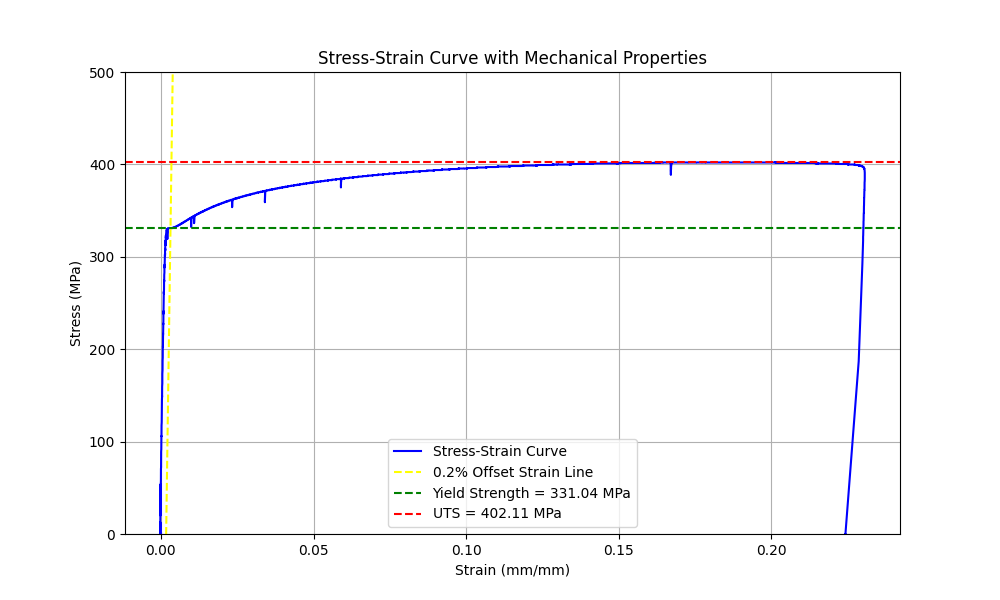

Young's Modulus (E): 231.65 GPa
Ultimate Tensile Strength (UTS): 402.11 MPa
Yield Strength: 331.04 MPa


(<Figure size 1000x600 with 1 Axes>,
 {'E_GPa': np.float64(231.64933944845575),
  'UTS_MPa': np.float64(402.1077456),
  'Yield_Strength_MPa': np.float64(331.04443310267226)})

In [23]:
coupon_test()

In [14]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib widget
    # Constants
    Thickness=2.544 # mm
    Width=10.14  # mm
    area = Thickness * Width  # Calculate the area of the specimen
    
    # Load tensile test data
    df = pd.read_csv('C-3DKA-5.csv', header=[0])
    
    #df.columns = [f"{col[0]} {col[1]}" for col in df.columns]
    
    # Extract relevant columns
    #time = df["Time (sec)"]
    #displacement = df["Crosshead separation (mm)"]
    force = df[df.columns[1]]
    elongation = df[df.columns[2]]
    strain = elongation # Strain in mm/mm
    
    # Calculate stress and strain
    force = force * 1000 # Convert kN to N
    stress = (force / area)  # N/m^2 or Pa
    uts = stress.max()
    
    #find the data before uts
    idx_peak = np.argmax(stress)
    strain_up = strain[:idx_peak+1]
    stress_up = stress[:idx_peak+1]
    
    #Boundary for 20% - 50% of UTS
    elastic_low = 0.1 * uts
    elastic_up = 0.3 * uts
    
    elastic_reg = (elastic_low <= stress_up) & (stress_up <= elastic_up)
    
    stress_ela = stress_up[elastic_reg]
    strain_ela = strain_up[elastic_reg] 
    
    E, intercept = np.polyfit(strain_ela, stress_ela, 1)
    print(f"Young's Modulus is: {E} MPa",)
    E_GPa = E / 1000  # Convert MPa to GPa
    print(f"Intercept: {intercept} MPa")

Young's Modulus is: 72247.30786412091 MPa
Intercept: 149.1849926425779 MPa


In [39]:
    # Select over 30% of UTS, as yield stress will over 30% uts
    strain_new = elongation
    stress_new = (force / area)
    mask = (10 <= stress)
    strain_mask = strain_new[mask]
    stress_mask = stress_new[mask]
    
    offset_decimal = 0.002  # 0.2% in decimal
    offset_line = E * (strain_new - offset_decimal) + intercept

In [41]:
    #Find the Yield strength
    diff = stress_mask - offset_line
    cross_index = np.where(diff <= 0)[0][0] 
    x1 = strain_mask[cross_index-1]
    x2 = strain_mask[cross_index]
    y1 = diff[cross_index-1]
    y2 = diff[cross_index]
    yield_strain = x1 - y1 * (x2 - x1) / (y2 - y1)
    yield_strength = np.interp(yield_strain, strain, stress)
   

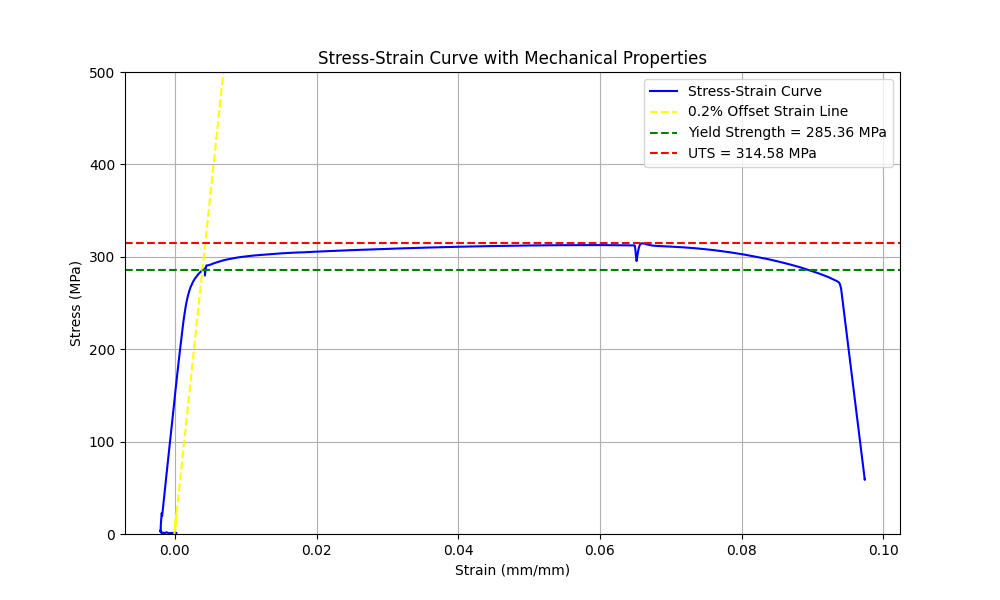

Young's Modulus (E): 72.25 GPa
Ultimate Tensile Strength (UTS): 314.58 MPa
Yield Strength: 285.36 MPa


In [46]:
    #Plot
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(strain, stress, label='Stress-Strain Curve', color='blue')
    ax.plot(strain_new, offset_line, label='0.2% Offset Strain Line', color='yellow',linestyle = '--')
    ax.axhline(y=yield_strength, label=f'Yield Strength = {yield_strength:.2f} MPa', color='green', linestyle = '--')
    ax.axhline(y=uts, color='red', linestyle = '--', label=f'UTS = {uts:.2f} MPa')
    
    ax.set_xlabel('Strain (mm/mm)')
    ax.set_ylabel('Stress (MPa)')
    ax.set_title('Stress-Strain Curve with Mechanical Properties')
    ax.legend()
    ax.grid(True)
    ax.set_ylim(0, 500)
    plt.show()
    # Print results
    print(f"Young's Modulus (E): {E_GPa:.2f} GPa")
    print(f"Ultimate Tensile Strength (UTS): {uts:.2f} MPa")
    print(f"Yield Strength: {yield_strength:.2f} MPa")
    